In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

from matplotlib.ticker import FormatStrFormatter
from sklearn.impute import SimpleImputer 

In [2]:
df = pd.read_csv('data/information.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [3]:
df.shape

(10000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [5]:
df.describe()

,id,price,year,odometer,lat,long
count,1.000000e+04,1.000000e+04,9964.000000,10000.00000,9902.000000,9902.000000
mean,7.311541e+09,2.067842e+04,2010.927941,93324.13400,38.594142,-94.165877
std,4.477653e+06,1.246230e+05,9.672040,63181.17499,5.844895,18.128504
min,7.208550e+09,5.000000e+02,1915.000000,0.00000,-67.144243,-158.069300
25%,7.308189e+09,7.900000e+03,2008.000000,39147.25000,34.830368,-110.322086
50%,7.312757e+09,1.574950e+04,2013.000000,89000.00000,39.298522,-88.000050
75%,7.315274e+09,2.799000e+04,2017.000000,136875.00000,42.428070,-80.830000
max,7.317090e+09,1.234568e+07,2022.000000,283466.00000,64.947500,173.885502


In [6]:
df.describe(include='object')

,url,region,region_url,manufacturer,model,fuel,title_status,transmission,image_url,description,state,posting_date,price_category,date
count,10000,10000,10000,10000,9872,9937,9834,9955,9998,9998,10000,9998,10000,9998
unique,10000,393,405,40,3466,5,6,3,9081,9845,51,9957,3,9911
top,https://chattanooga.craigslist.org/ctd/d/chatt...,"kansas city, MO",https://kansascity.craigslist.org,ford,f-150,gas,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,2021-04-19T10:00:54-0400,high,2021-04-22 15:01:24+00:00
freq,1,86,86,1638,151,8402,9518,7700,188,7,1108,2,3495,3


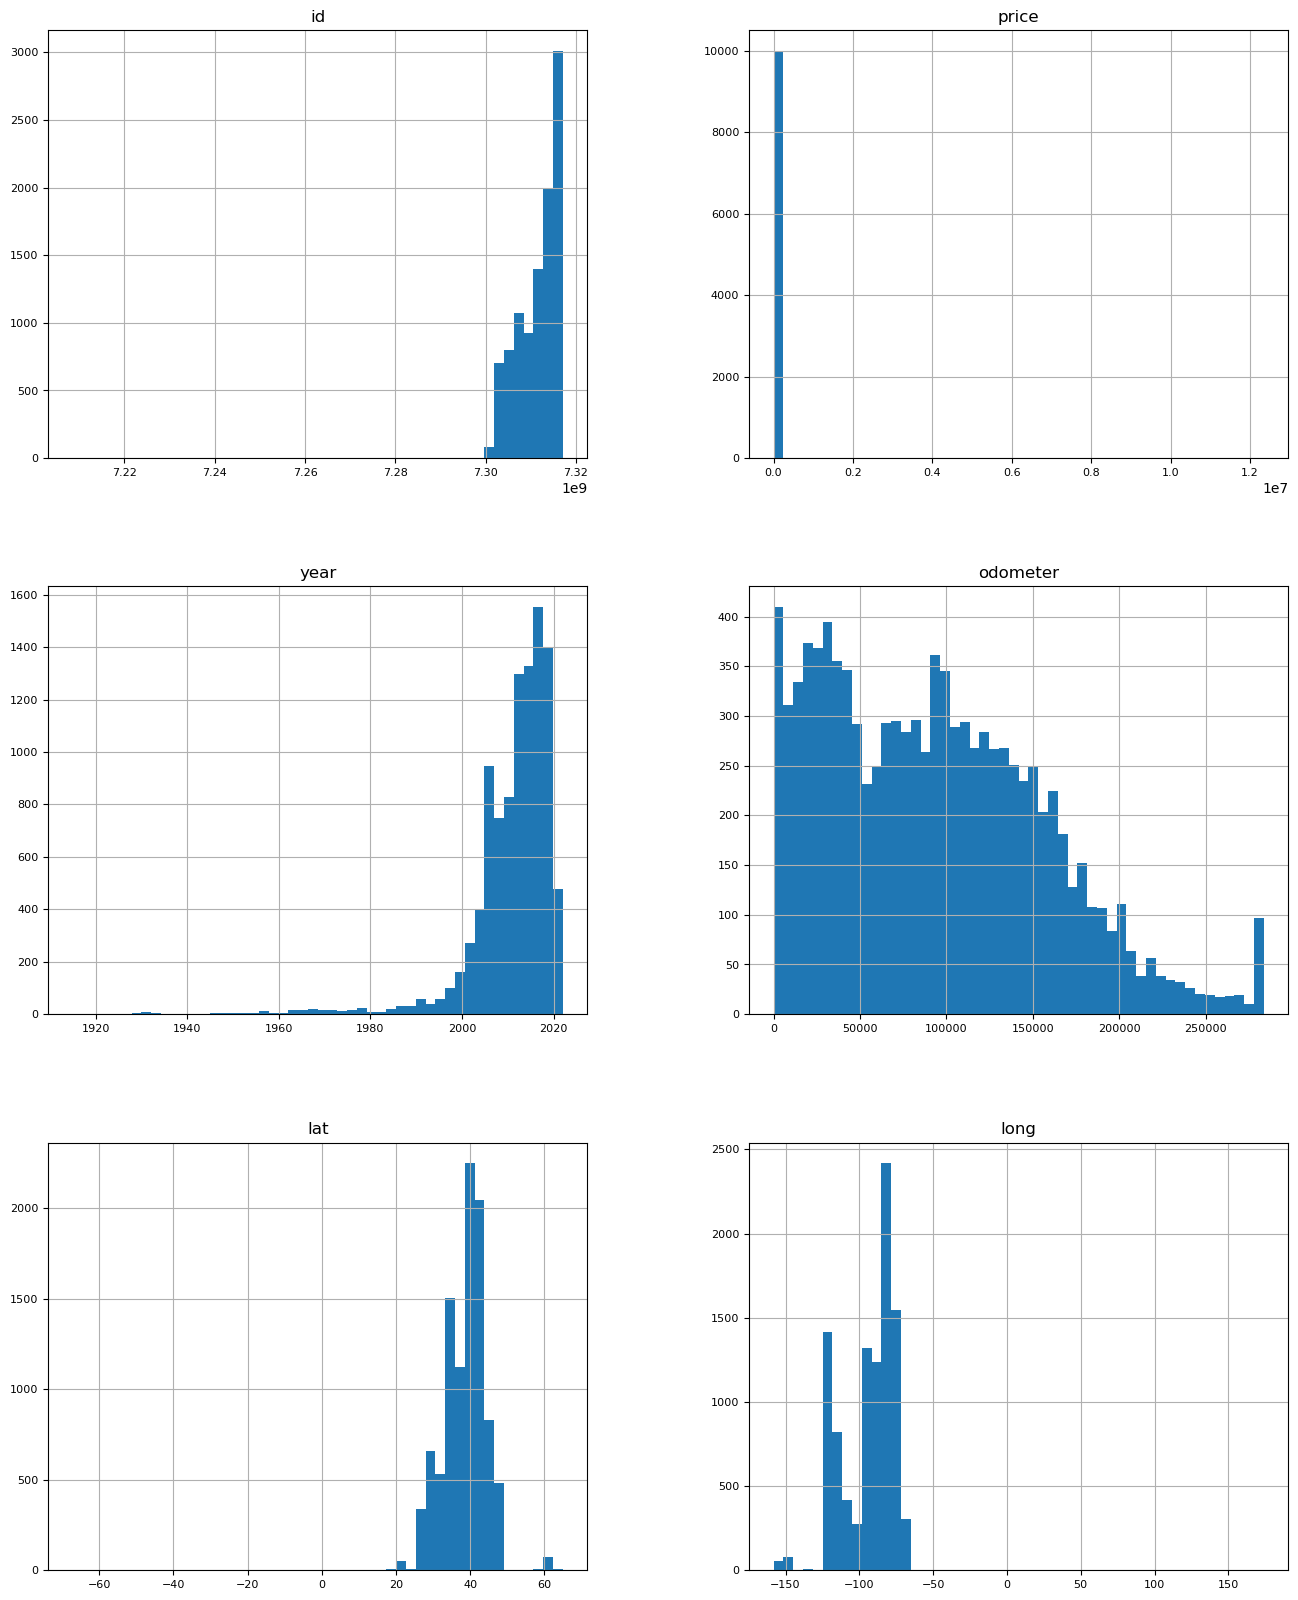

In [7]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

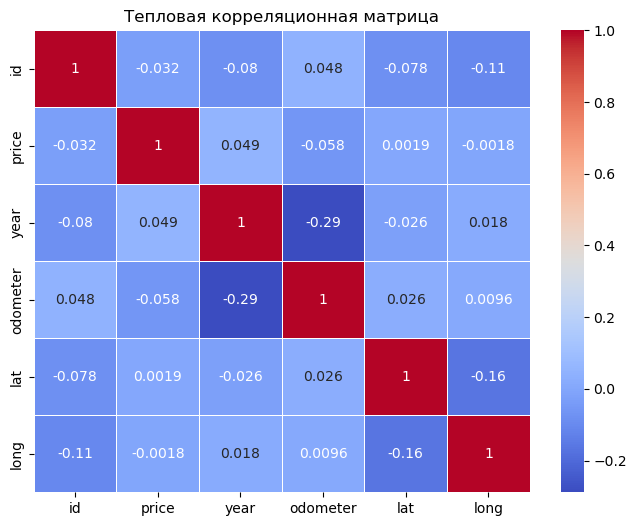

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая корреляционная матрица')
plt.show()

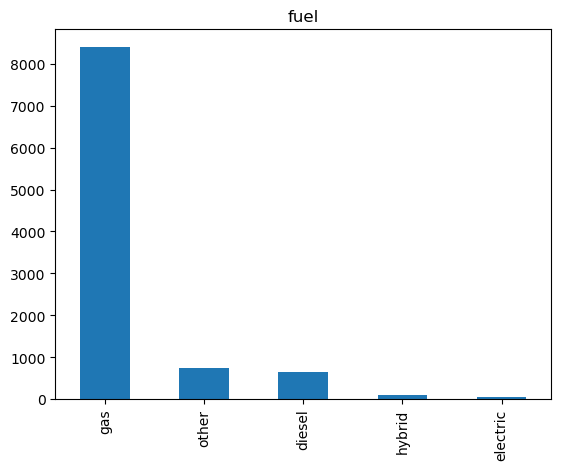

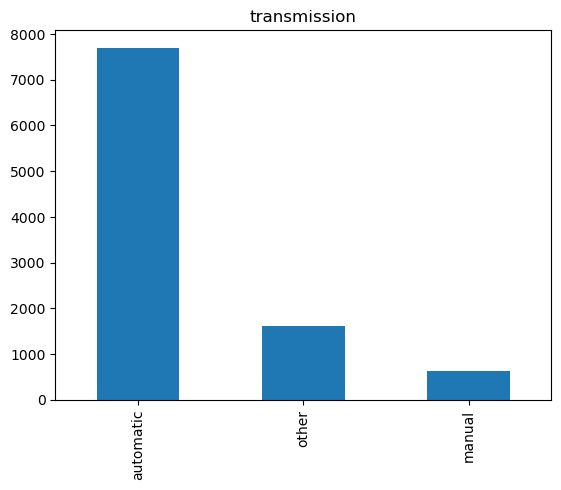

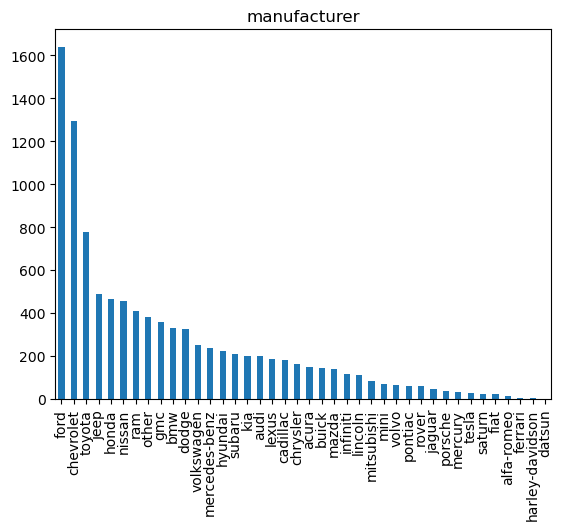

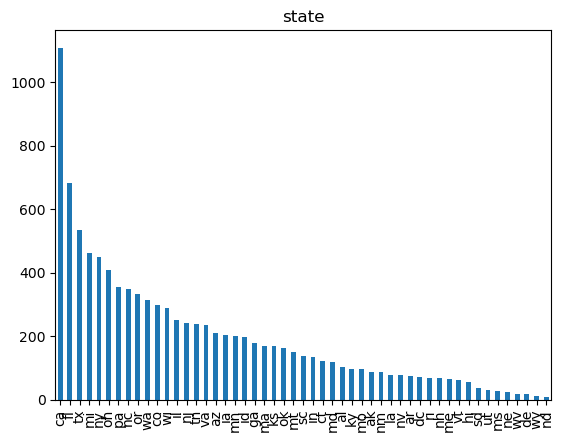

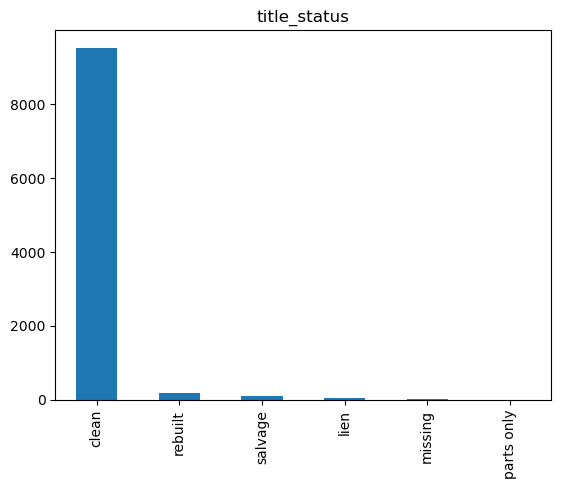

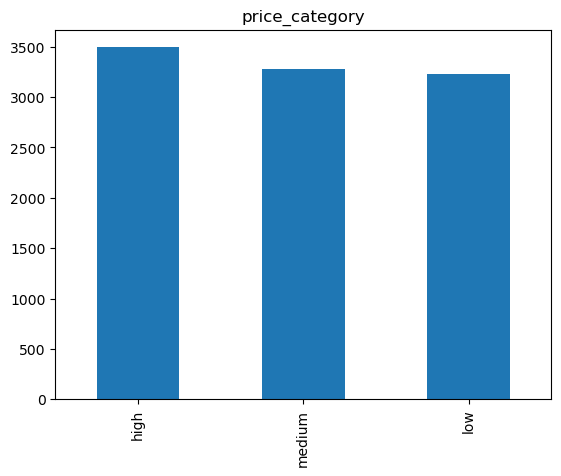

In [9]:
for i in ['fuel', 'transmission', 'manufacturer', 'state', 'title_status', 'price_category']:
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

# Data Preparation

### Removing missing ones

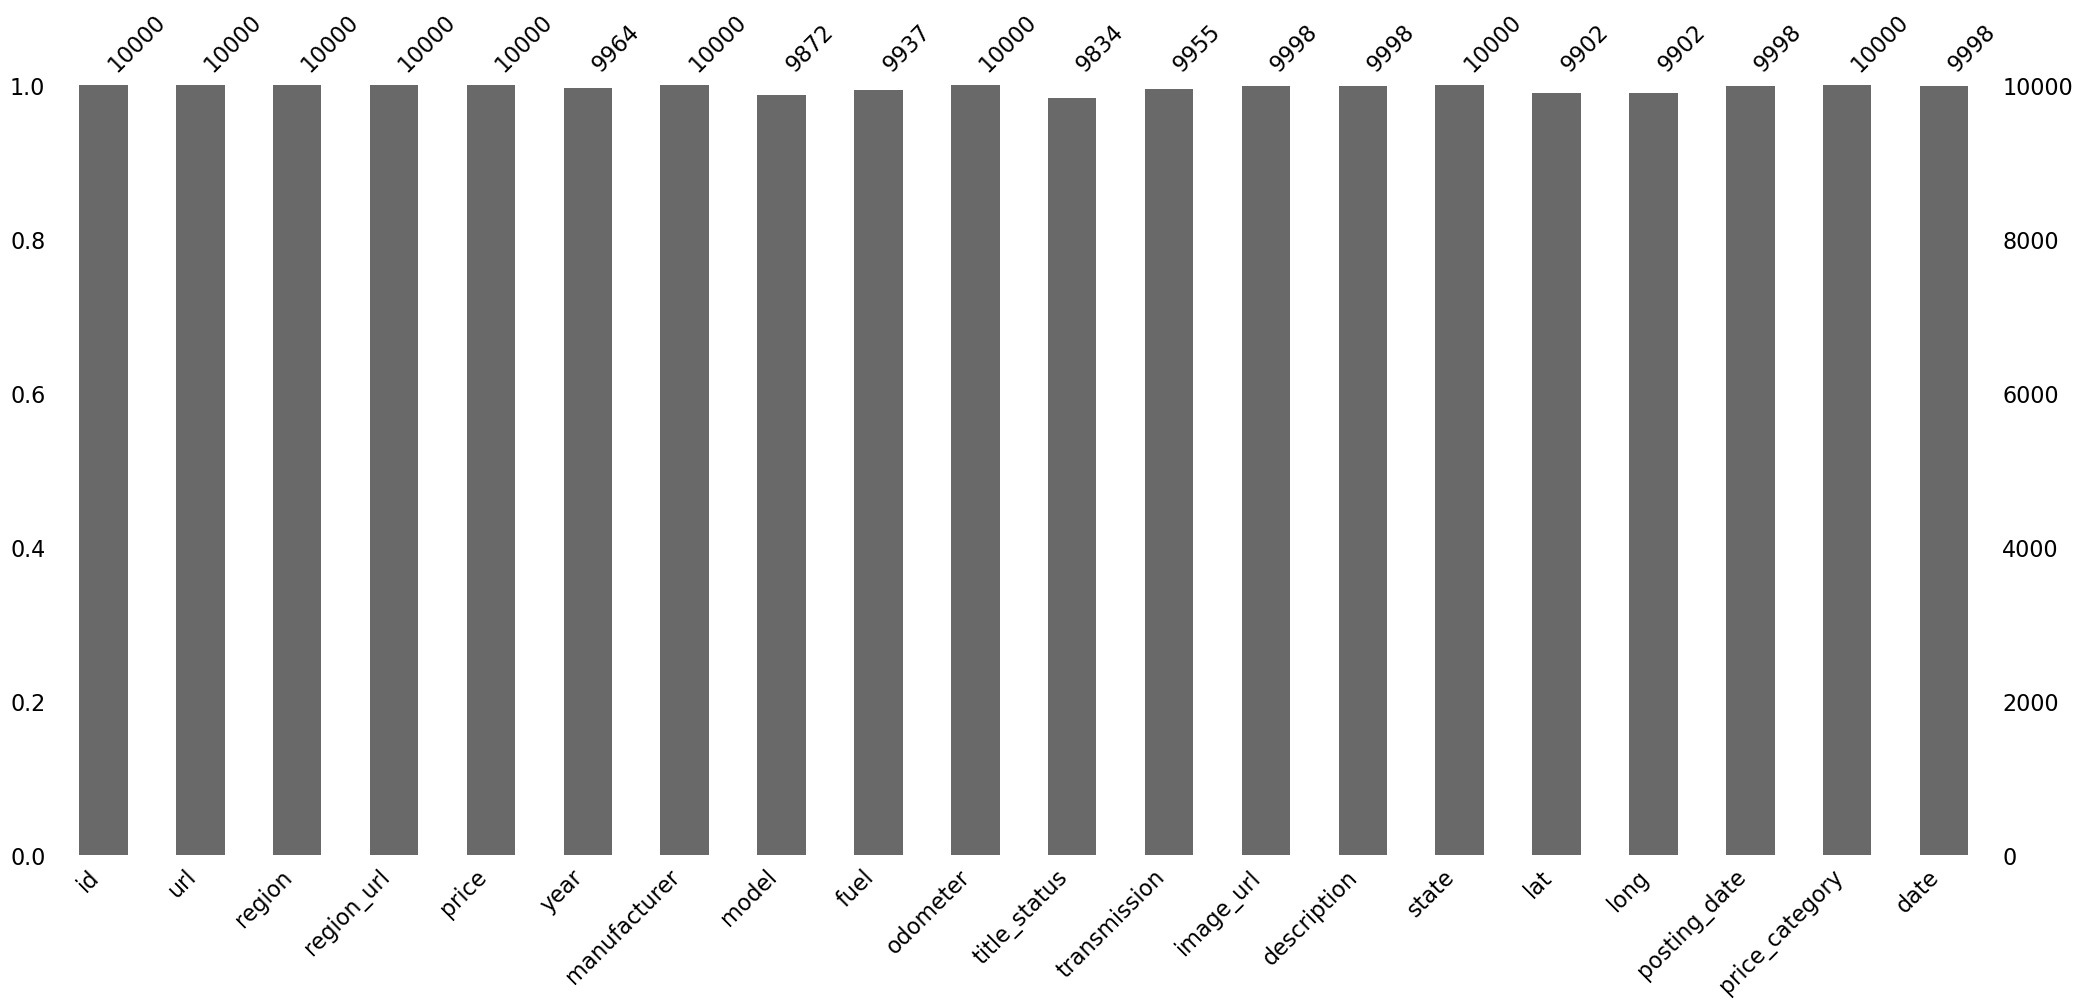

In [10]:
msno.bar(df);

In [11]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2)) 

In [12]:
print_useful_rows_info(df) 

Количество полностью заполненных объектов из всей выборки: 9507
Процент полностью заполненных объектов из всей выборки: 95.07


In [13]:
missing_values = df.isna().sum().sort_values()
print('Количество пропусков в признаках:')
missing_values

Количество пропусков в признаках:


id                  0
state               0
price_category      0
manufacturer        0
odometer            0
region_url          0
region              0
url                 0
price               0
image_url           2
description         2
posting_date        2
date                2
year               36
transmission       45
fuel               63
lat                98
long               98
model             128
title_status      166
dtype: int64

In [14]:
df.year.value_counts(dropna=False)

2018.0    810
2017.0    809
2016.0    745
2013.0    699
2015.0    668
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: year, Length: 90, dtype: int64

In [15]:
df.long.value_counts(dropna=False)

 NaN          98
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: long, Length: 5083, dtype: int64

In [16]:
df.fuel.value_counts(dropna=False)

gas         8402
other        730
diesel       653
hybrid       108
NaN           63
electric      44
Name: fuel, dtype: int64

In [17]:
df.model.value_counts(dropna=False)

f-150                        151
NaN                          128
silverado 1500               110
1500                         100
camry                         77
                            ... 
grand caravan sport            1
Nascar                         1
titan le                       1
sorrento lx v6                 1
a3 2.0t premium plus pzev      1
Name: model, Length: 3467, dtype: int64

In [18]:
df.transmission.value_counts(dropna=False)

automatic    7700
other        1624
manual        631
NaN            45
Name: transmission, dtype: int64

In [19]:
df.title_status.value_counts(dropna=False)

clean         9518
rebuilt        171
NaN            166
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [20]:
df.dropna(subset=['year', 'long'], inplace=True)

other_cols = ['fuel', 'model', 'transmission', ]
df[other_cols] = SimpleImputer(strategy='constant', fill_value='other').fit_transform(df[other_cols])

df['title_status'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['title_status']])

In [21]:
print_useful_rows_info(df) 

Количество полностью заполненных объектов из всей выборки: 9868
Процент полностью заполненных объектов из всей выборки: 100.0


### Formatting Data

In [22]:
df.dtypes

id                  int64
url                object
region             object
region_url         object
price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer            int64
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
date               object
dtype: object

In [23]:
df[['year', 'posting_date', 'date']]

,year,posting_date,date
0,2020.0,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00
1,2016.0,2021-05-03T15:40:21-0400,2021-05-03 19:40:21+00:00
2,2017.0,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00
3,2013.0,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00
4,2021.0,2021-05-03T18:32:06-0400,2021-05-03 22:32:06+00:00
...,...,...,...
9995,2002.0,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00
9996,2008.0,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00
9997,2011.0,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00
9998,2015.0,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00


In [24]:
df.year = df.year.astype('int64')
df.posting_date = pd.to_datetime(df.posting_date, utc=True)
df.date  = pd.to_datetime(df.date , utc=True)

In [25]:
df[['year', 'posting_date', 'date']]

,year,posting_date,date
0,2020,2021-04-17 16:30:50+00:00,2021-04-17 16:30:50+00:00
1,2016,2021-05-03 19:40:21+00:00,2021-05-03 19:40:21+00:00
2,2017,2021-04-28 10:52:20+00:00,2021-04-28 10:52:20+00:00
3,2013,2021-04-17 14:08:57+00:00,2021-04-17 14:08:57+00:00
4,2021,2021-05-03 22:32:06+00:00,2021-05-03 22:32:06+00:00
...,...,...,...
9995,2002,2021-04-10 20:33:57+00:00,2021-04-10 20:33:57+00:00
9996,2008,2021-05-03 13:36:30+00:00,2021-05-03 13:36:30+00:00
9997,2011,2021-04-22 19:14:01+00:00,2021-04-22 19:14:01+00:00
9998,2015,2021-04-14 14:14:42+00:00,2021-04-14 14:14:42+00:00


In [26]:
df.dtypes

id                              int64
url                            object
region                         object
region_url                     object
price                           int64
year                            int64
manufacturer                   object
model                          object
fuel                           object
odometer                        int64
title_status                   object
transmission                   object
image_url                      object
description                    object
state                          object
lat                           float64
long                          float64
posting_date      datetime64[ns, UTC]
price_category                 object
date              datetime64[ns, UTC]
dtype: object

### Elimination of emissions

In [27]:
numerical_signs = ['price', 'year', 'odometer', 'lat', 'long']

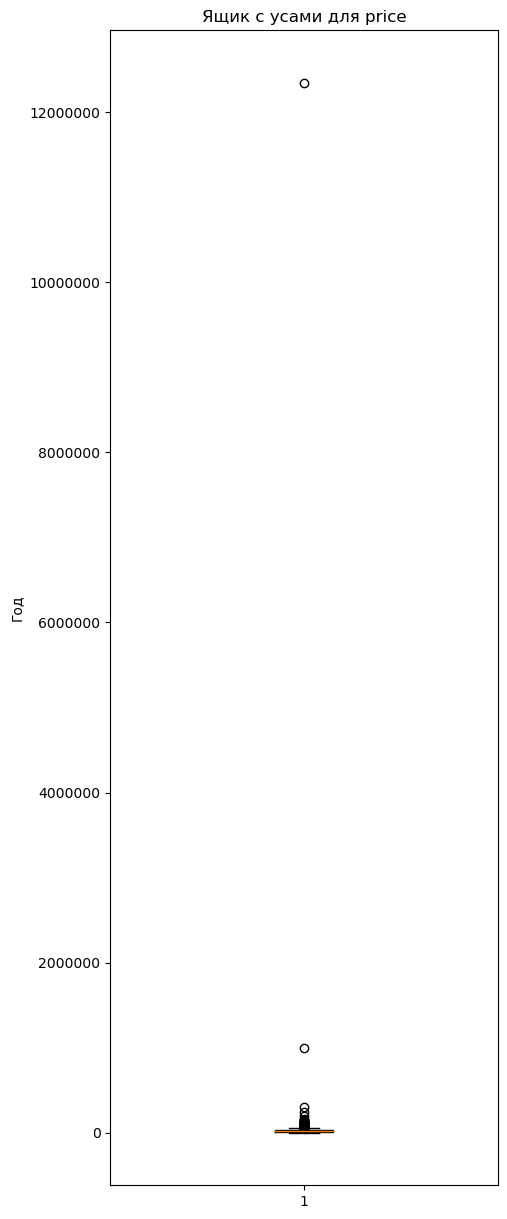

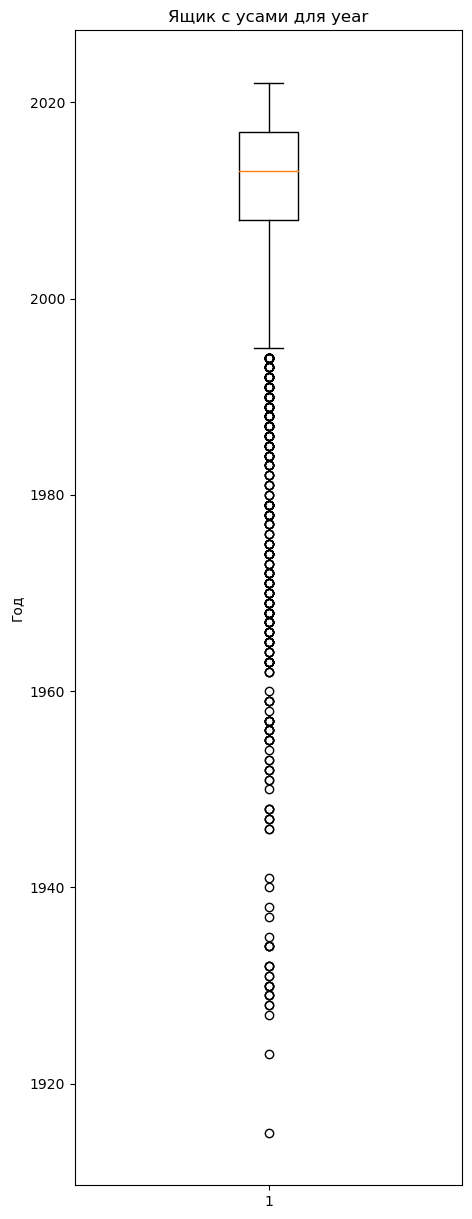

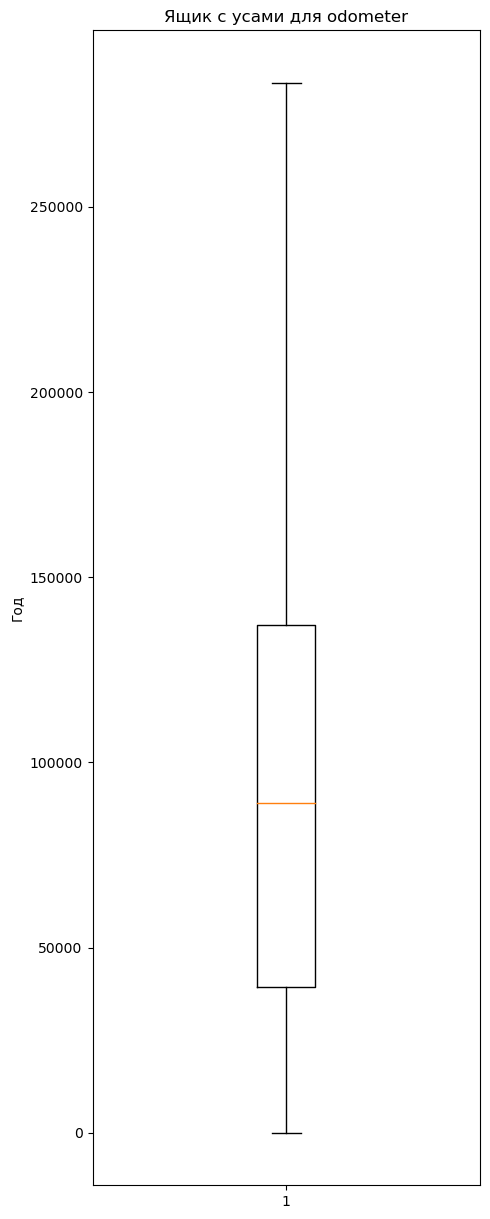

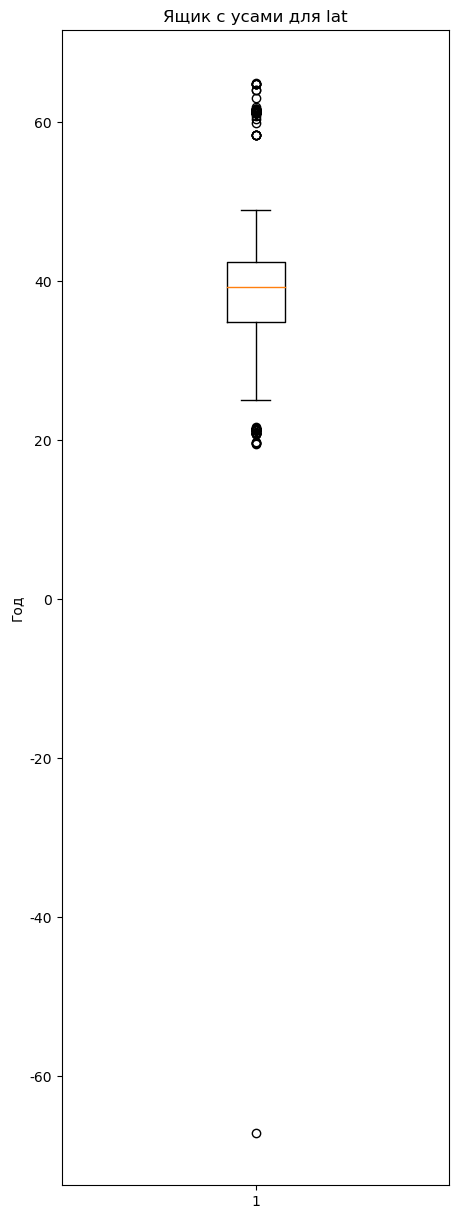

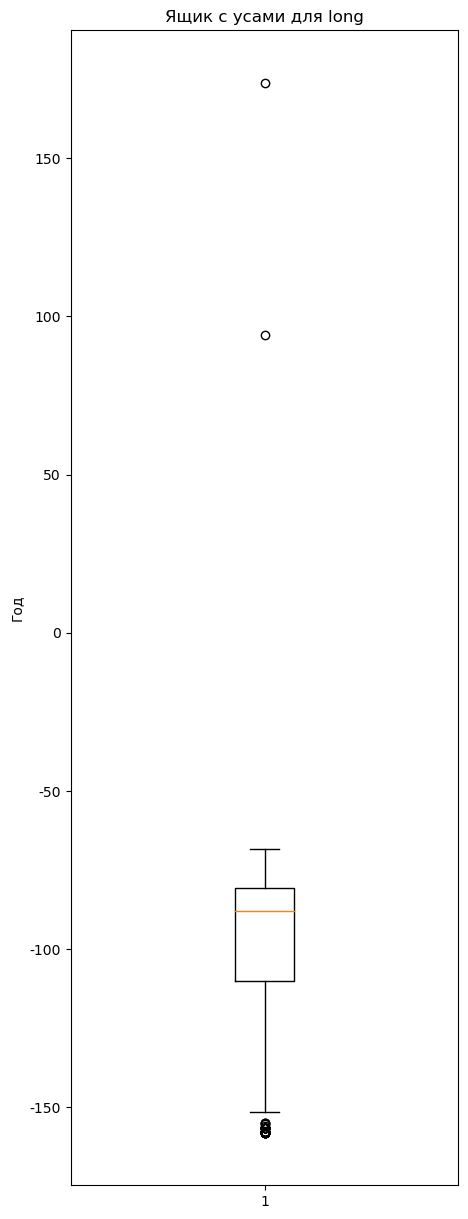

In [28]:
for i in numerical_signs:   
    fig, ax = plt.subplots(figsize=(5, 15))
    ax.boxplot(df[i])
    ax.set_ylabel('Год')
    ax.set_title(f'Ящик с усами для {i}')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [29]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [30]:
for i in numerical_signs:
    boundaries = calculate_outliers(df[i])
    is_outlier_lower_limit = (df[i] < boundaries[0])
    is_outlier_upper_limit = (df[i] > boundaries[1])
    df.loc[is_outlier_lower_limit, i] = int(boundaries[0])
    df.loc[is_outlier_upper_limit, i] = int(boundaries[1])

In [31]:
df_number_years = df.groupby(['year']).agg({'id': 'count'})
df_number_years = df_number_years.rename(columns={'id': 'quantity'})
df_number_years

,quantity
year,
1994,394
1995,33
1996,25
1997,44
1998,55
1999,81
2000,79
2001,122
2002,149


In [32]:
df = df.query("year not in [2021, 2022]")